In [1]:
# Importing the libraries
%matplotlib inline

import os
import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import Input

from sklearn.model_selection import train_test_split

In [2]:
# defining paths for images
desktop = os.path.join(os.path.expanduser('~'), 'Desktop')
data_dir = os.path.join(desktop, 'machine_learning_work', '01_Project_Transfer_Learning_Bears', 'data_dir')
black_bear_path = os.path.join(data_dir, "black_bear")
sloth_bear_path = os.path.join(data_dir, "sloth_bear")

In [3]:
# defining all categories of images
categories = {
    'black_bear': black_bear_path,
    'sloth_bear': sloth_bear_path
}

In [4]:
# defining a funcion to load and process the images 
def load_class_images(class_dir):
    """
    Loads the image, resizes it to target_size, and returns the PIL image and the array 
    with batch dimensions for easier manipulation.
    """
    img = image.load_img(class_dir, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # adds the batch dimension
    x = preprocess_input(x)
    return img, x

In [5]:
# configuring parameters to divide the data - desired splits for train and validation (70%, 15%)
train_split = 0.7
val_split = 0.15

# list to store the data
data = []

In [6]:
# iterate over each category and colect the images
for c, (category, category_path) in enumerate(categories.items()):
    images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(category_path)
              for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.jpeg', '.png']]

    for img_path in images:
        img, x = load_class_images(img_path)
        data.append({'x': np.array(x[0]), 'y': c})
        
    num_classes = len(categories.items())

In [7]:
# shuffles the data
random.shuffle(data)

In [8]:
# calculate the indices of the division based on the total quantity of images
num_data  = len(data)
idx_train = int(train_split * num_data)
idx_val   = int((train_split + val_split) * num_data)

train_data = data[:idx_train]
val_data   = data[idx_train:idx_val]
test_data  = data[idx_val:]

In [9]:
# extract the arrays and list labels

x_train, y_train = np.array([item["x"] for item in train_data]), [item["y"] for item in train_data]
x_val, y_val     = np.array([item["x"] for item in val_data]),   [item["y"] for item in val_data]
x_test, y_test   = np.array([item["x"] for item in test_data]),  [item["y"] for item in test_data]

print("Test labels (one-hot not yet applied):", y_test)

Test labels (one-hot not yet applied): [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 

In [10]:
print(x_test.shape)
x_train.shape

(543, 224, 224, 3)


(2534, 224, 224, 3)

In [11]:
# normalizes images (converts to float32 and scales to [0,1])
x_train = x_train.astype('float32') / 255.
x_val   = x_val.astype('float32')   / 255.
x_test  = x_test.astype('float32')  / 255.

In [12]:
print(x_test.shape)

(543, 224, 224, 3)


In [13]:
# convert the labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val   = keras.utils.to_categorical(y_val, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)

print("Shape of test labels:", y_test.shape)

Shape of test labels: (543, 2)


In [14]:
# print a summary of the loaded data
print("Finished loading %d images from %d categories" % (len(data), num_classes))
print("Split: training = %d, validation = %d, test = %d" % (len(x_train), len(x_val), len(x_test)))
print("Training data format:", x_train.shape)
print("Training label format:", y_train.shape)

Finished loading 3620 images from 2 categories
Split: training = 2534, validation = 543, test = 543
Training data format: (2534, 224, 224, 3)
Training label format: (2534, 2)


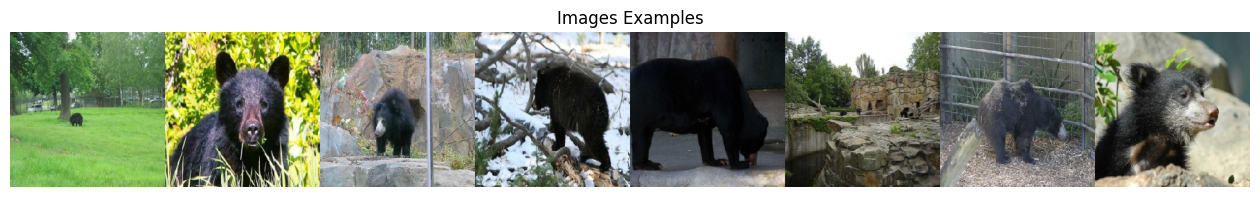

In [15]:
# viewing some random images (Collect all images (paths) from folders to display)
root = os.getcwd() # actual folder
all_images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root)
              for f in filenames if os.path.splitext(f)[1].lower()
              in ['.jpg', '.jpeg', '.png']]
# select 8 random index
idxs = [random.randint(0, len(all_images)-1) for i in range(8)]
imgs = [image.load_img(all_images[i], target_size=(224,224)) for i in idxs]
# concatenate images honrizontally
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)

plt.figure(figsize=(16,4))
plt.imshow(concat_image)
plt.title("Images Examples")
plt.axis('off')
plt.show()

In [16]:
# building a simple model (from scratch) using Sequential
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Input(shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# proceed with model.fit()
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=15,
                    validation_data=(x_val, y_val))

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.4971 - loss: 0.7972 - val_accuracy: 0.5101 - val_loss: 0.6926
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5440 - loss: 0.6885 - val_accuracy: 0.5930 - val_loss: 0.6769
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.6075 - loss: 0.6689 - val_accuracy: 0.5617 - val_loss: 0.6739
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5834 - loss: 0.6703 - val_accuracy: 0.5617 - val_loss: 0.6690
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.6073 - loss: 0.6580 - val_accuracy: 0.5912 - val_loss: 0.6418
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6105 - loss: 0.6408 - val_accuracy: 0.6243 - val_loss: 0.6401
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6225 - loss: 0.6335 - val_accuracy: 0.6317 - val_loss: 0.6216
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6593 - loss: 0.6046 - val_accuracy: 0.6483 - val_loss:

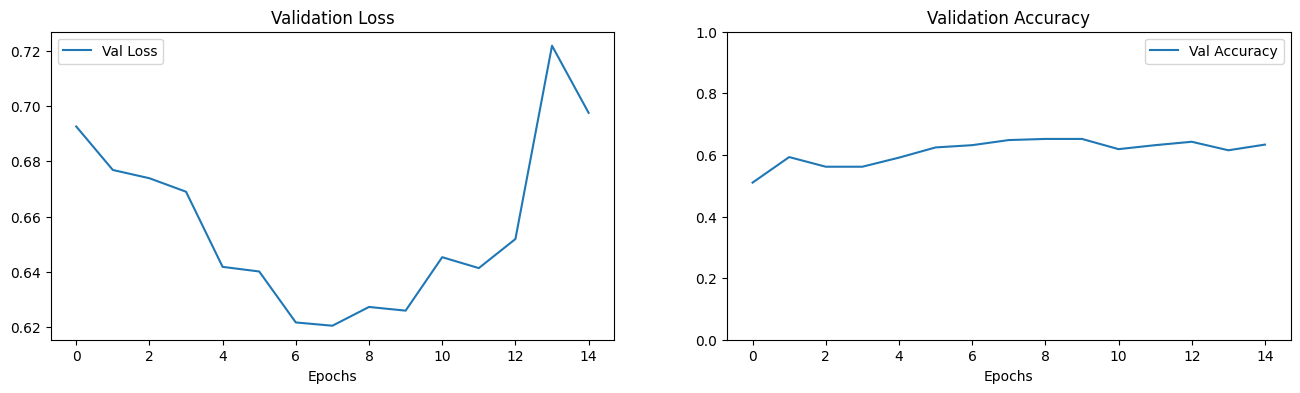

In [18]:
# plot of performance graphs
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax1.plot(history.history["val_loss"], label='Val Loss')
ax1.set_title("Validation Loss")
ax1.set_xlabel("Epochs")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], label='Val Accuracy')
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylim(0, 1)
ax2.legend()

plt.show()

In [19]:
print(x_test.shape, y_test.shape)

(543, 224, 224, 3) (543, 2)


In [20]:
# evaluate the simple model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.6930894255638123
Test accuracy: 0.591160237789154


In [21]:
# transfer Learning with VGG16 (Load VGG16 architecture pre-trained with ImageNet weights)
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# reference for the VGG input layer
inp = vgg.input

# create a new classification layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect the new layer to the penultimate layer of the VGG
out = new_classification_layer(vgg.layers[-2].output)

# create a new model that goes from the VGG input to our new output layer
model_new = Model(inp, out)

In [23]:
# freezes all VGG layers except the new final layer
for layer in model_new.layers[:-1]:
    layer.trainable = False
# ensure that the last layer is trainable
model_new.layers[-1].trainable = True

model_new.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model_new.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [24]:
# train the model with transfer learning
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=15, 
                         validation_data=(x_val, y_val))

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 396s 18s/step - accuracy: 0.5021 - loss: 0.7668 - val_accuracy: 0.6556 - val_loss: 0.6324
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 332s 16s/step - accuracy: 0.6013 - loss: 0.6463 - val_accuracy: 0.6409 - val_loss: 0.6194
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 316s 15s/step - accuracy: 0.6616 - loss: 0.6033 - val_accuracy: 0.6317 - val_loss: 0.6349
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 317s 15s/step - accuracy: 0.6587 - loss: 0.6101 - val_accuracy: 0.6667 - val_loss: 0.5879
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 324s 16s/step - accuracy: 0.6859 - loss: 0.5711 - val_accuracy: 0.6593 - val_loss: 0.6034
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 297s 15s/step - accuracy: 0.6926 - loss: 0.5665 - val_accuracy: 0.6685 - val_loss: 0.5792
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 299s 15s/step - accuracy: 0.7104 - loss: 0.5494 - val_accuracy: 0.6740 - val_loss: 0.5761
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 291s 14s/step - accuracy: 0.7289 - loss: 0.5470 - val_accuracy: 0.

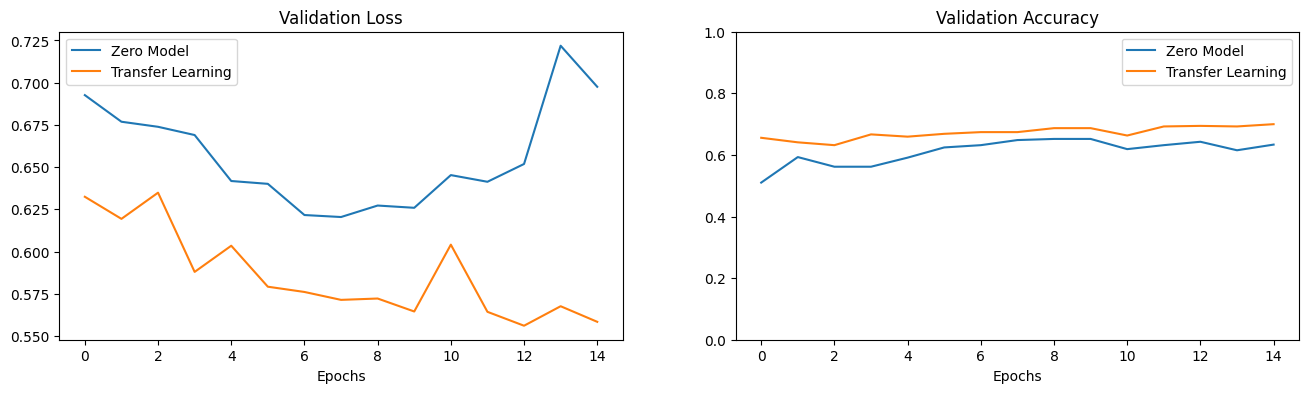

In [25]:
# comparative plot between the two trainings
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax1.plot(history.history["val_loss"], label='Zero Model')
ax1.plot(history2.history["val_loss"], label='Transfer Learning')
ax1.set_title("Validation Loss")
ax1.set_xlabel("Epochs")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], label='Zero Model')
ax2.plot(history2.history["val_accuracy"], label='Transfer Learning')
ax2.set_title("Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylim(0, 1)
ax2.legend()

plt.show()

In [26]:
# Evaluate the model with transfer learning on the test set
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)
print('Test loss (transfer learning):', loss)
print('Test accuracy (transfer learning):', accuracy)

Test loss (transfer learning): 0.5713022351264954
Test accuracy (transfer learning): 0.6906077265739441


In [27]:
# prediction on an example image - choose an example image (e.g. an image from class 'black_bear')
example_path = os.listdir(black_bear_path)
first_image = example_path[30] 
full_image_path = os.path.join(black_bear_path, first_image)
img_example, x_example = load_class_images(full_image_path)
probabilities = model_new.predict(x_example)
print("Odds for each class:", probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
Odds for each class: [[1.0000000e+00 1.6656468e-12]]
